# Plotting and Regression

Data from [the UCI ML database](https://archive.ics.uci.edu/ml/datasets/Daily+Demand+Forecasting+Orders).

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [16]:
df = pd.read_csv('demand.csv', sep=';')

In [6]:
df.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


# Visualization

Let's do some quick visualization of these variables, just to make sure they do correlate with the variable we're targeting.

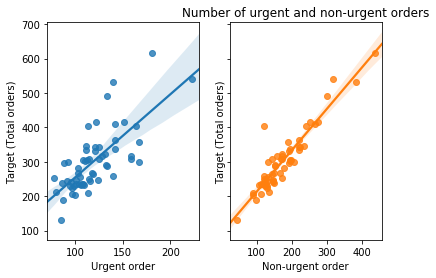

In [37]:
# Number of urgent and non-urgent orders

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

sns.regplot(data = df, x = 'Urgent order', y = 'Target (Total orders)', ax = ax0)
sns.regplot(data = df, x = 'Non-urgent order', y = 'Target (Total orders)', ax = ax1)

plt.show()

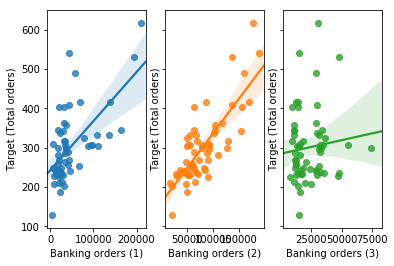

In [32]:
# Banking orders 1, 2, and 3

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True)

sns.regplot(data = df, x = 'Banking orders (1)', y = 'Target (Total orders)', ax = ax0)
sns.regplot(data = df, x = 'Banking orders (2)', y = 'Target (Total orders)', ax = ax1)
sns.regplot(data = df, x = 'Banking orders (3)', y = 'Target (Total orders)', ax = ax2)

plt.show()

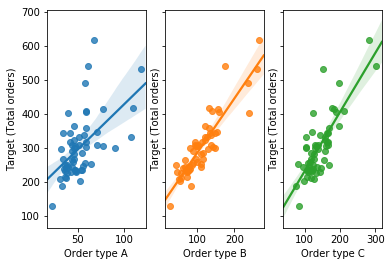

In [33]:
# Order types A, B, and C

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True)

sns.regplot(data = df, x = 'Order type A', y = 'Target (Total orders)', ax = ax0)
sns.regplot(data = df, x = 'Order type B', y = 'Target (Total orders)', ax = ax1)
sns.regplot(data = df, x = 'Order type C', y = 'Target (Total orders)', ax = ax2)

plt.show()

Now we'll separate the data into `predictors` and `total_orders` for regression.

In [12]:
total_orders = df['Target (Total orders)']

In [17]:
predictors = df.drop('Target (Total orders)', axis=1)
predictors.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257


In [52]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, total_orders, 
                                                    test_size = .2, random_state = 6)

# Create the regressor
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 1.0
Root Mean Squared Error: 1.9320840315887104e-12


Well, this is interesting. I can't say I've ever seen a simple linear regression produce an $R^2$ of 1. Let's do a little investigating.

In [56]:
# Create another LR, this time to do CV 
reg = LinearRegression()

# Compute 5-fold cross-validation scores
cv_scores = cross_val_score(reg, predictors, total_orders, cv = 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[1. 1. 1. 1. 1.]
Average 5-Fold CV Score: 1.0


Same result with multiple regressions. Let's take a peek inside reg_all to see what it learned.

In [61]:
# Print the coefficients and intercept from our original reg_all regressor
print(reg_all.coef_, reg_all.intercept_)

[ 1.45613837e-13 -6.13412346e-14  5.69477777e-15 -1.41673389e-14
  1.00000000e+00  1.00000000e+00  1.00000000e+00 -8.39954515e-15
  1.23660846e-17  3.73248824e-18 -3.81901337e-17  6.43188035e-17] -6.821210263296962e-13


From the above, we can see that the regressor seems to have learned that three variables account for -all- the variability in number of orders, and the other coefficients have been shrunk nearly to zero. 

In [75]:
total_orders.head(3)

0    539.577
1    224.675
2    129.412
Name: Target (Total orders), dtype: float64

In [77]:
# Values from the predictors dataframe below: Order Type A, B, and C
print(61.54 + 175.586 + 302.45)
print(38.06 + 56.04 + 130.58)
print(21.84 + 25.13 + 82.5)

539.576
224.68
129.47


In [76]:
predictors.head(3)

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947


We can, in fact, find the number of orders simply by adding up the totals of the Order Type A, B, and C columns. The regressor is correct that most of the relevant information is provided by those three variables.

A bit boring of a result (I didn't know this dataset would essentially have the answer built-in to it!), but at least we've verified here that linear regression does work in the most obvious of cases.